Nenwin-project (NEural Networks WIthout Neurons) for
the AI Honors Academy track 2020-2021 at the TU Eindhoven.

Authors: Teun Schilperoort, Lulof Pirée

April 2021

Copyright (C) 2021 Lulof Pirée, Teun Schilperoort

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# MNIST with Nenwin

In [4]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt

from nenwin.all_particles import MarbleEaterNode, Marble, Node, MarbleEmitterNode
from nenwin.model import NenwinModel
from nenwin.input_placer import InputPlacer
from nenwin.backprop.filename_gen import FilenameGenerator
from nenwin.backprop.trainer import NenwinTrainer
from nenwin.backprop.training_stats import TrainingStats
from nenwin.backprop.loss_function import NenwinLossFunction
from nenwin.mnist.load_dataset import load_mnist_dataset
from nenwin.mnist.train_network import create_trainer

In [2]:
DATASET = load_mnist_dataset()
print(DATASET)

MNISTDataset
	train samples: 50000
	vali samples: 10000
	test samples: 10000
	input type: <class 'torch.Tensor'>
	label type: <class 'int'>


## First architecture: symmetric

The following architecture is used to testrun the training algorithm
on real data. It is designed as follows:
* There is a square, in which Nodes are placed in a grid. 
* There are no nodes in a smaller square area in the middle of the larger square: this is the input region.
* MarbleEaterNodes used as outputs are placed in a circle around the rectangle. They are equally divided over the circumference of the circle (i.e. the length of the arch between two neighbouring MarbleEaterNodes is equal for all pairs). The radius and position of the circle is such that it intersects the vertices of the large square.

Sketch (circle not shown):
```
 ^  100+-------------+
 |     |   nodes     |
 y     |   +----+    |
       |   |    |    |
       |   +----+    |
       |             |
      0+-------------+
       0             100 -> x
```



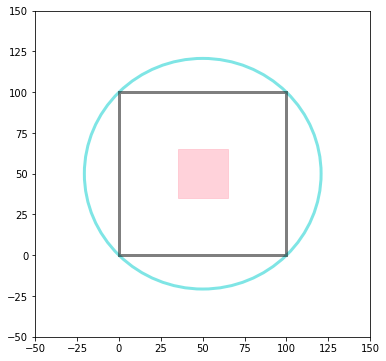

In [25]:
SQUARE_SIZE = (100, 100)
SQUARE_LOWER_LEFT_POS = (0, 0)
INPUT_REGION_SIZE = (30, 30)
INPUT_REGION_LOWER_LEFT_POS = (35, 35)
CIRCLE_RADIUS = 100 / np.sqrt(2)
CIRCLE_CENTER = (50, 50)

def plot_shapes():
    """
    Generate a simple plot of the square, circle and input region as defined above.
    As a visual check if the numerical descriptions are correct.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    circle = plt.Circle(CIRCLE_CENTER, CIRCLE_RADIUS, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
    square = plt.Rectangle(SQUARE_LOWER_LEFT_POS, *SQUARE_SIZE, facecolor='none',
                edgecolor="black", linewidth=3, alpha=0.5)
    ax.add_patch(square)
    input_region = plt.Rectangle(INPUT_REGION_LOWER_LEFT_POS, *INPUT_REGION_SIZE, facecolor='pink',
                edgecolor="pink", linewidth=1, alpha=0.7)
    ax.add_patch(input_region)
    ax.set_xlim((-50, 150))
    ax.set_ylim((-50, 150))
    plt.show()

def model_of_backprob_experiment() -> NenwinModel:
    ...
    # zero = torch.tensor([0, 0], dtype=torch.float)
    # mass = 10

    # center = torch.tensor([0, 0], dtype=torch.float, requires_grad=False)
    # node_positions = [torch.tensor(pos, dtype=torch.float) for pos in ((0, 10), (10, 0), (0, -10), (-10, 0))]
    # marble_pos = torch.tensor([2, 2], dtype=torch.float)

    # nodes = [Node(pos, zero, zero, mass, NewtonianGravity(), 1, 1, 1, 1) 
    #     for pos in node_positions]

    # marble = Marble(marble_pos, zero, zero, mass, NewtonianGravity(), None)

    # return NenwinModel(nodes, (marble,))

plot_shapes()
# model = model_of_backprob_experiment()
# trainer = create_trainer()